In [57]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [103]:
df = pd.read_csv(r'Project 6-Segmenting customers into clusters-Dataset.csv',encoding= 'unicode_escape')
#print (df)

In [104]:
df.shape

(541909, 8)

In [105]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom


In [106]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [107]:



# Drop only those rows where the specified column has a missing value

print(df.dropna(subset=['Description','CustomerID'],inplace=True))



None


In [108]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [109]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [110]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df['InvoiceNo'] = number.fit_transform(df['InvoiceNo'].astype('str'))
df['StockCode'] = number.fit_transform(df['StockCode'].astype('str'))
df['Description'] = number.fit_transform(df['Description'].astype('str'))
df['InvoiceDate'] = number.fit_transform(df['InvoiceDate'].astype('str'))
df['Country'] = number.fit_transform(df['Country'].astype('str'))

In [111]:
df.dtypes

InvoiceNo        int32
StockCode        int32
Description      int32
Quantity         int64
InvoiceDate      int32
UnitPrice      float64
CustomerID     float64
Country          int32
dtype: object

In [112]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3249,3716,6,525,2.55,17850.0,35
1,0,2649,3724,6,525,3.39,17850.0,35
2,0,2855,861,8,525,2.75,17850.0,35
3,0,2803,1813,6,525,3.39,17850.0,35
4,0,2802,2776,6,525,3.39,17850.0,35


In [113]:
customer_ids = df['CustomerID']

In [114]:
df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,9950.901755,1573.257501,2024.692726,12.061303,10295.558554,3.460471,15287.690570,32.827731
std,5552.295845,844.054584,1089.177346,248.693370,5903.158359,69.315162,1713.600303,6.738565
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,0.000000,12346.000000,0.000000
25%,5060.000000,937.000000,1143.000000,2.000000,5107.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1522.000000,1987.000000,5.000000,10284.000000,1.950000,15152.000000,35.000000
75%,14651.000000,2106.000000,2945.000000,12.000000,15444.000000,3.750000,16791.000000,35.000000
max,22189.000000,3683.000000,3895.000000,80995.000000,20459.000000,38970.000000,18287.000000,36.000000


In [115]:
df.drop(['InvoiceNo', 'Description','InvoiceDate','CustomerID'], axis=1, inplace=True)

In [116]:
kmeans = KMeans(n_clusters=2)

In [117]:
kmeans.fit(df)

KMeans(n_clusters=2)

In [118]:
pred = kmeans.predict(df)

In [119]:
pred

array([0, 0, 0, ..., 0, 0, 1])

In [120]:
pd.Series(pred).value_counts()

1    231673
0    175156
dtype: int64

In [121]:
kmeans.inertia_

124344467767.74275

In [122]:
kmeans.score(df)

-124344467767.74275

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [124]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05
mean,-1.943826e-15,2.075071e-15,-3.085516e-16,-4.533509e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.863931e+00,-3.257311e+02,-4.992379e-02,-4.871627e+00
25%,-7.538118e-01,-4.045671e-02,-3.189019e-02,3.223641e-01
50%,-6.072778e-02,-2.839365e-02,-2.179138e-02,3.223641e-01
75%,6.311714e-01,-2.465022e-04,4.176999e-03,3.223641e-01
max,2.499536e+00,3.256341e+02,5.621654e+02,4.707639e-01


In [125]:
SSE_scaled = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)


In [126]:
len(SSE_scaled)

19

In [127]:
frame_scaled = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE_scaled})

Text(0, 0.5, 'SSE')

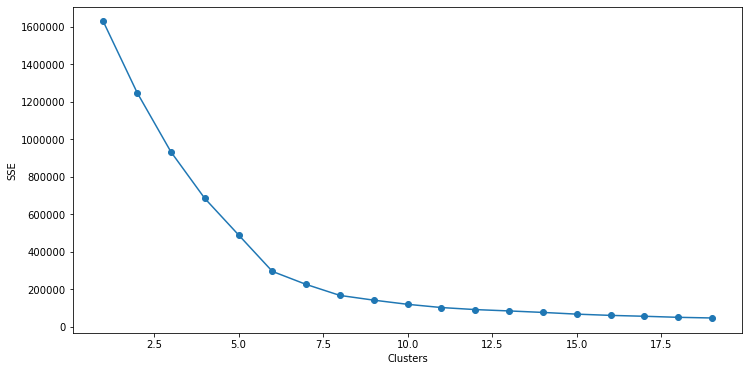

In [128]:
plt.figure(figsize=(12,6))
plt.plot(frame_scaled['Cluster'],frame_scaled['SSE'],marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [141]:
kmeans = KMeans(n_jobs = -1, n_clusters=6 )
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [142]:
pred

array([2, 2, 2, ..., 4, 4, 4])

In [143]:
frame = pd.DataFrame(data_scaled)

In [144]:
frame['cluster'] = pred

In [146]:
frame['CustomerID'] = customer_ids

### Each cluster disctribution

In [147]:
frame['cluster'].value_counts()

0    211002
2    160770
4     35052
5         2
1         2
3         1
Name: cluster, dtype: int64

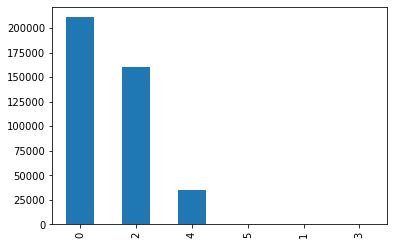

In [149]:
frame['cluster'].value_counts().plot(kind='bar')